# Intra-Panel Compound Figure Forgery Generator

**Description**

This notebook describes how to create Intra-Panel Compound Figures, in which one
of its panels was manipulated.

## Types of forgeries -- Intra-Panel:
1- Retouching:\
The process of image beautification leading to an experiment misreading.\
This modality implements contrast, brightness, and blurring adjustments that highlight or obfuscate an image region.\

    1.1 Contrast
    1.2 Brightness
    1.3 Blurring


2- Cleaning:\
The result of obfuscating a foreground object using a background region\
To apply this forgery we are going to use two common modalities:

    2.1- Brute-force: Cleaning an object using a contiguous background region.
    2.2- Inpainting (Criminisi et al. 2004). 



3- Duplication:\
The action of copying and pasting a region of an image within the same or another image, using or not
post-processing operations.\

     3.1 - Copy-Move Forgery: Copying each object respecting some affine transformation ( scale, translation, rotation, and flip)
   
     Although affine transformations are very used in real forgeries, if we combine the transformations
     without a human supervising, the result image tends to be very different from the real cases of forgery.
     Because of that, We choose to not combine those transformations.
     
     
     3.2 - Random object-to-background copy-move (Random): 
     This forgery choose n random objects from a source image and copy-paste them on random background position.    
    
----

Author: João Phillipe Cardenuto\
Email: phillipe.cardenuto@ic.unicamp.br\
August, 2022
----




## Import paths

In [1]:
# Insert here the path of each component
LIB_PATH = '../'
TEMPLATES_BIO_PATH = '../templates_json/Mc'
TEMPLATES_MIX_PATH = '../templates_json/Mix'
TEMPLATES_WB_PATH = '../templates_json/Wb'


In [2]:
# Including path to forgery_lib dataset on the notebook
import sys
sys.path.append(LIB_PATH)

# Import common libraries
from forgery_lib import IntraPanelForgery
import os, json, copy, random
from PIL import Image
from glob import glob
from random import randint
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

## Read source dataset with all biological images 

In [3]:
# Reads the csv file and insert all images aspect ratio on that
def get_img_ar(img_path):
    
    img = np.array(Image.open(img_path))
    return img.shape[0] / img.shape[1]

dataset_dataframe = pd.read_csv('../datasetSrc.csv')


In [4]:
# Fix dataset source image paths
DATASET_PATH = '../'
dataset_dataframe['dataPath'] = DATASET_PATH + dataset_dataframe['dataPath']
dataset_dataframe['dataGTPath'] = DATASET_PATH + dataset_dataframe['dataGTPath']

In [5]:
dataset_dataframe.subset_tag.value_counts()

wblot      1009
obj_map     850
gray        444
pmc         382
overlap     165
color       108
Name: subset_tag, dtype: int64

In [6]:
dataset_dataframe.columns

Index(['class', 'DatasetRef', 'License', 'Link', 'ObjectMaskPath',
       'RealDataPath', 'subset_tag', 'dataGTPath', 'dataPath', 'AR'],
      dtype='object')

## Read Templates and fonts

In [7]:
# Loading templates and fonts
bio_templates = sorted(glob(f"{TEMPLATES_BIO_PATH}/*") + glob(f"{TEMPLATES_MIX_PATH}/*"))
wb_templates = sorted(glob(f"{TEMPLATES_WB_PATH}/*") + glob(f"{TEMPLATES_MIX_PATH}/*"))
fonts = glob(f"{LIB_PATH}/forgery_lib/figure/fonts/*")

### 1.1 Cleaning using a background position

In [8]:
# 1.1 Cleaning using a background position
import os
from PIL import Image
from glob import glob
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
import copy

In [9]:
def get_local_dataset(query):
    """
    This function selectes a local dataset for an input image (that will participate the forgery)
    removing it from the real dataset to avoid any contamination during the forgery procedure
    """
    local_dataframe = dataset_dataframe.copy()
    local_dataframe.drop(local_dataframe.loc[local_dataframe['dataPath']==query['dataPath']].index, inplace=True)
    
    bio_data = local_dataframe[ local_dataframe['subset_tag'].isin(['obj_map','gray','color','pmc'])]
    wb_data = local_dataframe[ local_dataframe['subset_tag'].isin(['wblot'])]
    
    return bio_data.append(wb_data)


## Testing the functions

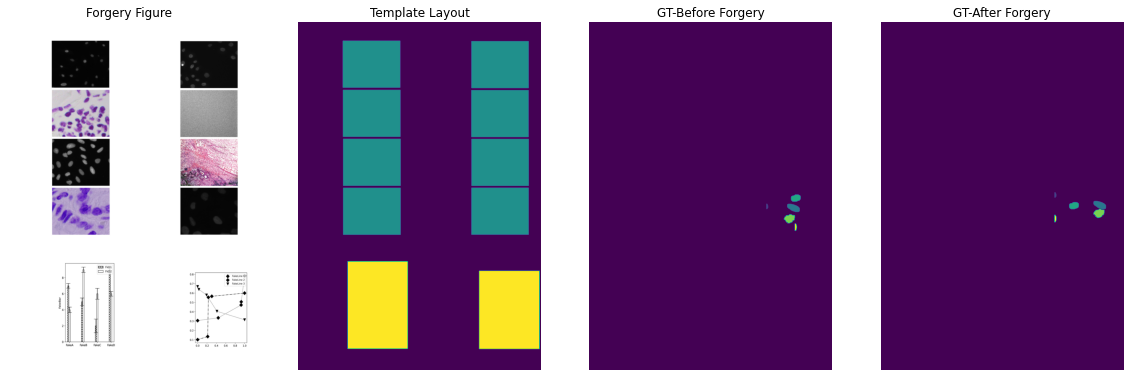

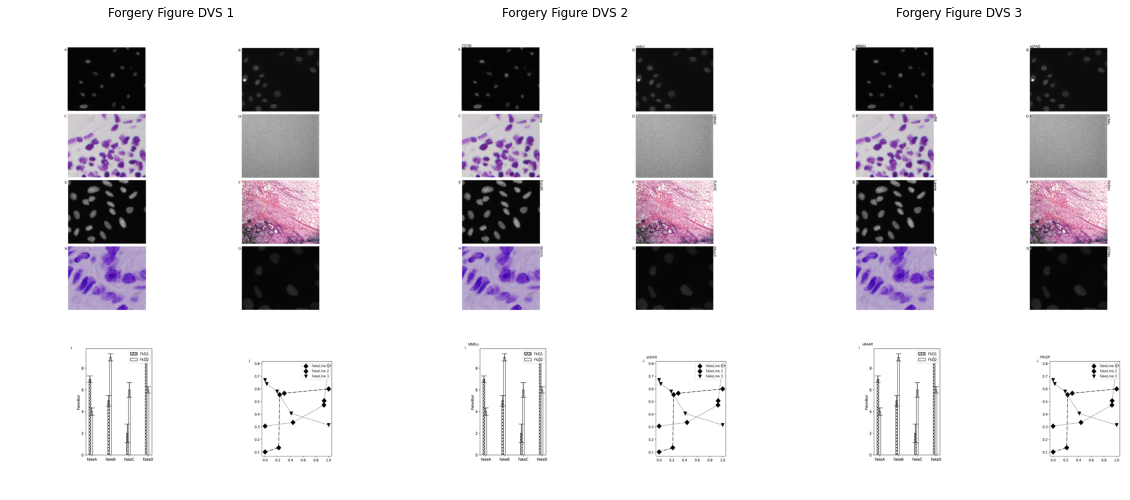

FORGERY METADATA


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'cleaning_using_bf',
  'args': {'n_objects': 10},
  'figure_type': 'intra-panel',
  'modality': 'cleaning'},
 'figure_annotations': {'height': 4008,
  'width': 2799,
  'template': '../templates_json/Mc/105_gt.json',
  1: {'bbox': {'x0': 516, 'x1': 1178, 'y0': 216, 'y1': 756},
   'class': 'Microscopy',
   'image_id': '../srcDataset/00508.png'},
  2: {'bbox': {'x0': 1998, 'x1': 2657, 'y0': 221, 'y1': 761},
   'class': 'Microscopy',
   'image_id': '../srcDataset/00179.png'},
  3: {'bbox': {'x0': 518, 'x1': 1180, 'y0': 782, 'y1': 1322},
   'class': 'Microscopy',
   'image_id': '../srcDataset/00300.png'},
  4: {'bbox': {'x0': 1997, 'x1': 2656, 'y0': 785, 'y1': 1325},
   'class': 'Microscopy',
   'image_id': '../srcDataset/00892.png'},
  5: {'bbox': {'x0': 520, 'x1': 1182, 'y0': 1346, 'y1': 1886},
   'class': 'Microscopy',
   'image_id': '../srcDataset/01310.png'},
  6: {'bbox': {'x0': 1999, 'x1': 2658, 'y0': 1347, 'y1': 1887},
   '

In [10]:
# Function test
#####################
# Loading data
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.iloc[0]

# Get local dataset with ours constrains
local_dataset = get_local_dataset(query)

# Loading data
forgery_info = {
    'function_name' : 'cleaning_using_bf',
    'args' : {'n_objects':10},
    'multi_panel': False,
    'forgery_class': 'Microscopy'
}

tampering = IntraPanelForgery(local_dataset, forgery_info, query, template_dataset=bio_templates)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.figure);plt.title("Forgery Figure");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.template_image);plt.title("Template Layout");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_after_forgery);plt.title("GT-Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_before_forgery);plt.title("GT-After Forgery");plt.axis('off')
plt.show()


plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1); plt.imshow(tampering.apply_verbose_text(tampering.figure, 1,random.choice(fonts)));plt.title("Forgery Figure DVS 1");plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(tampering.apply_verbose_text(tampering.figure, 2,random.choice(fonts)));plt.title("Forgery Figure DVS 2");plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(tampering.apply_verbose_text(tampering.figure, 3,random.choice(fonts)));plt.title("Forgery Figure DVS 3");plt.axis('off')
plt.show()
print("FORGERY METADATA")
tampering.get_forgery_metadata()

## Wraps all procedure in one function

In [11]:
# Insert the output path for the result figure and annotations
_OUTPUT_PATH = 'test/cleaning/bf'

def applying_cleaning_using_bf(query):
    
    # get local dataset without the query to avoid contamination
    local_dataset = get_local_dataset(query)
    
    # Apply the fuction until the algorithm be able to generate a forgery
    # or it reaches the limit of 5 attempts
    attempts = 10
    while attempts:
        forgery_info_args = {'n_objects':10}
        forgery_info = {
                'function_name' : 'cleaning_using_bf',
                'args' : forgery_info_args.copy() ,
                'forgery_class': 'Microscopy'
            }
        try:
            tampering = IntraPanelForgery(local_dataset, forgery_info, bio_templates, query)
        except:
            attempts=0
            break
         # Checking if the forgery was successfully done
        if tampering.forgery_image_gt.sum() > 500:
            break
        attempts=-1
    
    # Do Not create a output path if attempts is 0
    if attempts == 0:
        return False
    
    
    # Create outpath, if needed
    index_name = os.path.basename(query['dataPath'])
    index_name = index_name[:index_name.rfind(".")]
    local_output_path = f"{_OUTPUT_PATH}/{index_name}"
    os.makedirs(local_output_path, exist_ok=True)
    
    # Save pristine image, forgery image, background map region, object map region
    Image.fromarray(tampering.pristine_image).save(f"{local_output_path}/panel_pristine.png")
    Image.fromarray(tampering.forgery_image).save(f"{local_output_path}/panel_forgery.png")
    Image.fromarray(tampering.pristine_gt).save(f"{local_output_path}/panel_pristine_map.png")
    Image.fromarray(tampering.forgery_image_gt).save(f"{local_output_path}/panel_forgery_map.png")
    Image.fromarray(tampering.figure).save(f"{local_output_path}/figure.png")
    Image.fromarray(tampering.apply_verbose_text(tampering.figure, 1,random.choice(fonts))).save(f"{local_output_path}/figure_v1.png")
    Image.fromarray(tampering.apply_verbose_text(tampering.figure, 2,random.choice(fonts))).save(f"{local_output_path}/figure_v2.png")
    Image.fromarray(tampering.apply_verbose_text(tampering.figure, 3,random.choice(fonts))).save(f"{local_output_path}/figure_v3.png")
    Image.fromarray(tampering.figure_groundtruth_forgery).save(f"{local_output_path}/figure_forgery_gt.png")
    Image.fromarray(tampering.figure_groundtruth_pristine).save(f"{local_output_path}/figure_pristine_gt.png")

    # Save Annotations
    with open(f"{local_output_path}/annotations.json", 'w') as fp:
        json.dump(tampering.get_forgery_metadata(),fp)


In [12]:
# Save Image in Disk
# Uncomment the following lines to create your own dataset
#biologica_data = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
#query = biologica_data.iloc[0]
#applying_cleaning_using_bf(query)

----

# 1.2- Cleaning using inpainting

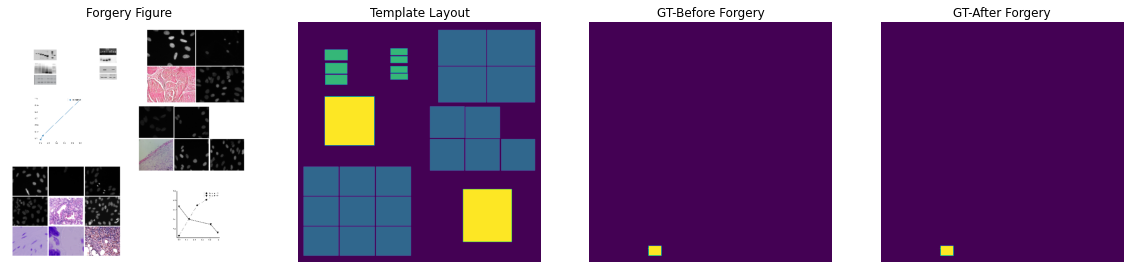

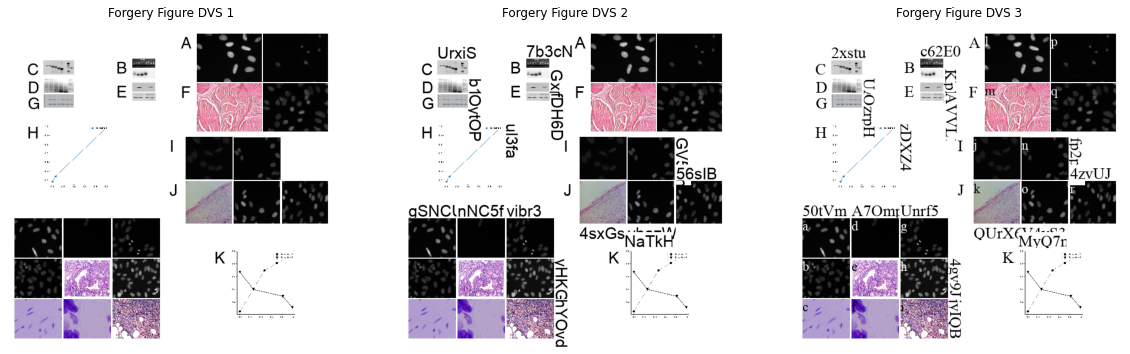

FORGERY METADATA


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'cleaning_with_inpainting',
  'args': {'n_objects': 1},
  'figure_type': 'intra-panel',
  'modality': 'cleaning'},
 'figure_annotations': {'height': 609,
  'width': 617,
  'template': '../templates_json/Mix/147_gt.json',
  1: {'bbox': {'x0': 356, 'x1': 478, 'y0': 20, 'y1': 111},
   'class': 'Microscopy',
   'image_id': '../srcDataset/00847.png'},
  2: {'bbox': {'x0': 480, 'x1': 602, 'y0': 20, 'y1': 111},
   'class': 'Microscopy',
   'image_id': '../srcDataset/00339.png'},
  3: {'bbox': {'x0': 235, 'x1': 278, 'y0': 67, 'y1': 84},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/02738.jpg'},
  4: {'bbox': {'x0': 68, 'x1': 126, 'y0': 70, 'y1': 97},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/02794.jpg'},
  5: {'bbox': {'x0': 235, 'x1': 278, 'y0': 87, 'y1': 104},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/02676.jpg'},
  6: {'bbox': {'x0': 69, 'x1': 125, 'y0': 104, 'y1': 131},
   'class': 'Western

In [13]:
# Function test
#####################
# Loading data
biologica_data = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['color'])]
# select a query
query =  biologica_data.iloc[7]

# Get local dataset with ours constrains
local_dataset = get_local_dataset(query)

# Loading data
forgery_info = {
    'function_name' : 'cleaning_with_inpainting',
    'args' : {'n_objects':1},
    'forgery_class': 'Microscopy'
}
tampering = IntraPanelForgery(local_dataset, forgery_info, query, template_dataset=bio_templates)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.figure);plt.title("Forgery Figure");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.template_image);plt.title("Template Layout");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_after_forgery);plt.title("GT-Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_before_forgery);plt.title("GT-After Forgery");plt.axis('off')
plt.show()


plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1); plt.imshow(tampering.apply_verbose_text(tampering.figure, 1,random.choice(fonts)));plt.title("Forgery Figure DVS 1");plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(tampering.apply_verbose_text(tampering.figure, 2,random.choice(fonts)));plt.title("Forgery Figure DVS 2");plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(tampering.apply_verbose_text(tampering.figure, 3,random.choice(fonts)));plt.title("Forgery Figure DVS 3");plt.axis('off')
plt.show()
print("FORGERY METADATA")
tampering.get_forgery_metadata()


----

# 2.1 Copy Move Forgery with Affine Transformations

In [14]:
def set_affine_transformation(choice,img):
    """
    This function selects at random three different affine function, with random params.
    We do not allow to the any affine function be applied simultaneously.
    """
    if choice == 'flip':
        t_types = { 'flip': True  }
    elif choice == 'translation':
        t_types = {
            'translation': (randint(20,img.shape[0]//5), randint(20,img.shape[1]//5)),
            'scale' : randint(1,3),
            }
    else:
        t_types = {
        'rotation': randint(30,90),
        'scale' : randint(1,3),
        }
    return t_types
        

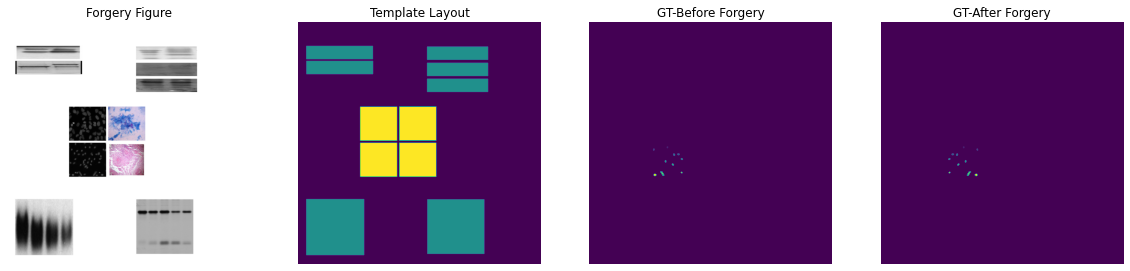

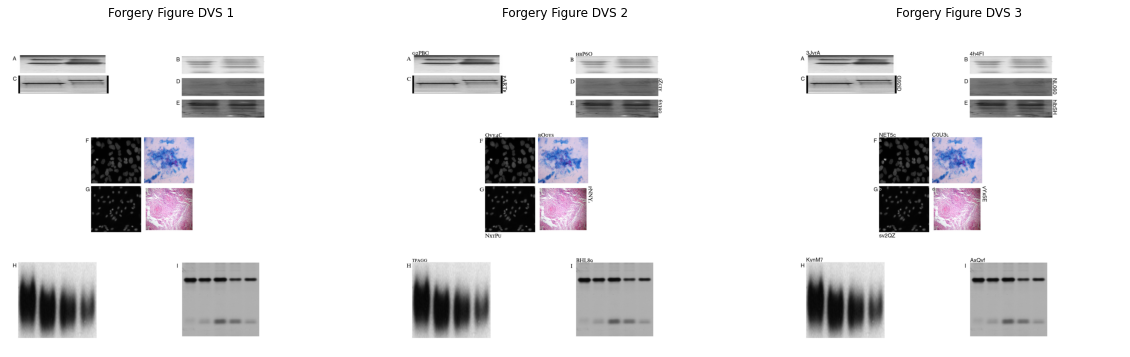

FORGERY METADATA


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'copy_move_forgery',
  'args': {'n_objects': 10, 't_types': {'flip': True}},
  'figure_type': 'intra-panel',
  'modality': 'duplication'},
 'figure_annotations': {'height': 1792,
  'width': 1800,
  'template': '../templates_json/Mix/212_gt.json',
  1: {'bbox': {'x0': 61, 'x1': 555, 'y0': 177, 'y1': 275},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/01967.jpg'},
  2: {'bbox': {'x0': 956, 'x1': 1408, 'y0': 182, 'y1': 280},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/01965.tif'},
  3: {'bbox': {'x0': 62, 'x1': 556, 'y0': 288, 'y1': 386},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/01988.tif'},
  4: {'bbox': {'x0': 956, 'x1': 1408, 'y0': 302, 'y1': 400},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/01971.tif'},
  5: {'bbox': {'x0': 956, 'x1': 1408, 'y0': 420, 'y1': 518},
   'class': 'WesternBlot',
   'image_id': '../srcDataset/01972.tif'},
  6: {'bbox': {'x0': 750, 'x1': 1024, 'y0'

In [16]:
# Function test
#####################
# Loading data
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.sample().iloc[0]
img = np.array(Image.open(query['dataPath']))

# Get local dataset with ours constrains
local_dataset = get_local_dataset(query)

# Loading data
forgery_info = {
    'function_name' : 'copy_move_forgery',
    'args' : {'n_objects':10,
             't_types': set_affine_transformation('flip',img)
             },
    'forgery_class': 'Microscopy'
    }
tampering = IntraPanelForgery(local_dataset, forgery_info, query, template_dataset=bio_templates)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.figure);plt.title("Forgery Figure");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.template_image);plt.title("Template Layout");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_after_forgery);plt.title("GT-Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_before_forgery);plt.title("GT-After Forgery");plt.axis('off')
plt.show()


plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1); plt.imshow(tampering.apply_verbose_text(tampering.figure, 1,random.choice(fonts)));plt.title("Forgery Figure DVS 1");plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(tampering.apply_verbose_text(tampering.figure, 2,random.choice(fonts)));plt.title("Forgery Figure DVS 2");plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(tampering.apply_verbose_text(tampering.figure, 3,random.choice(fonts)));plt.title("Forgery Figure DVS 3");plt.axis('off')
plt.show()
print("FORGERY METADATA")
tampering.get_forgery_metadata()

-----

# 2.2 Copy-Move from random background

## Test function

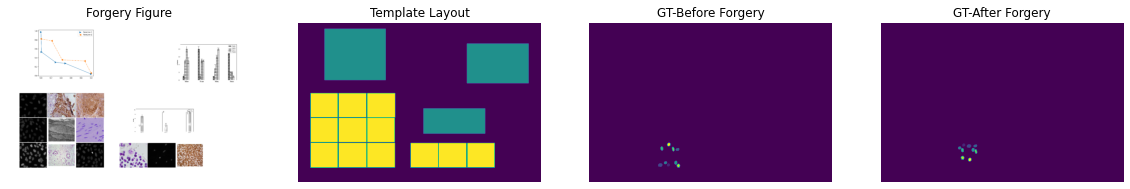

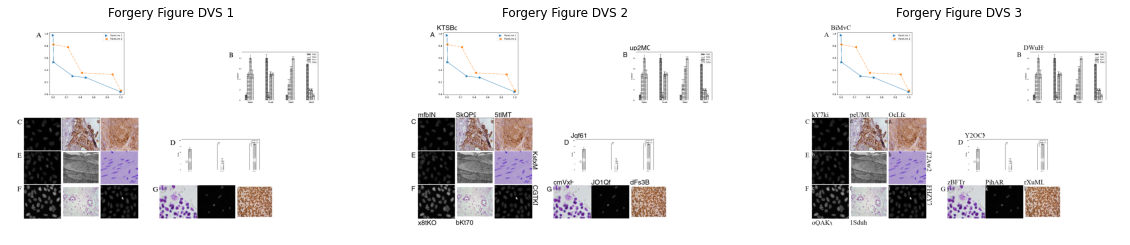

FORGERY METADATA


{'forgery_info': {'class': 'Microscopy',
  'function_name': 'random_copy_move',
  'args': {'n_objects': 10},
  'figure_type': 'intra-panel',
  'modality': 'duplication'},
 'figure_annotations': {'height': 966,
  'width': 1476,
  'template': '../templates_json/Mc/282_gt.json',
  1: {'bbox': {'x0': 161, 'x1': 533, 'y0': 35, 'y1': 347},
   'class': 'Graphs',
   'image_id': 'RANDOM_GRAPH'},
  2: {'bbox': {'x0': 1026, 'x1': 1401, 'y0': 125, 'y1': 366},
   'class': 'Graphs',
   'image_id': 'RANDOM_GRAPH'},
  3: {'bbox': {'x0': 76, 'x1': 242, 'y0': 426, 'y1': 573},
   'class': 'Microscopy',
   'image_id': '../srcDataset/00794.png'},
  4: {'bbox': {'x0': 246, 'x1': 416, 'y0': 426, 'y1': 573},
   'class': 'Microscopy',
   'image_id': '../srcDataset/01677.jpg'},
  5: {'bbox': {'x0': 420, 'x1': 590, 'y0': 426, 'y1': 574},
   'class': 'Microscopy',
   'image_id': '../srcDataset/01726.jpg'},
  6: {'bbox': {'x0': 762, 'x1': 1137, 'y0': 519, 'y1': 672},
   'class': 'Graphs',
   'image_id': 'RANDOM_GR

In [17]:
# Function test
#####################
# Loading data
biologica_data_with_gt = dataset_dataframe[ dataset_dataframe['subset_tag'].isin(['obj_map','gray','color'])]
# select a query
query =  biologica_data_with_gt.sample().iloc[0]
img = np.array(Image.open(query['dataPath']))

# Get local dataset with ours constrains
local_dataset = get_local_dataset(query)

# Loading data
forgery_info = {
    'function_name' : 'random_copy_move',
    'args' : {'n_objects':10},
    'forgery_class': 'Microscopy'
}
tampering = IntraPanelForgery(local_dataset, forgery_info, query, template_dataset=bio_templates)

# Plot Result
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1); plt.imshow(tampering.figure);plt.title("Forgery Figure");plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(tampering.template_image);plt.title("Template Layout");plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(tampering.gt_after_forgery);plt.title("GT-Before Forgery");plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(tampering.gt_before_forgery);plt.title("GT-After Forgery");plt.axis('off')
plt.show()


plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1); plt.imshow(tampering.apply_verbose_text(tampering.figure, 1,random.choice(fonts)));plt.title("Forgery Figure DVS 1");plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(tampering.apply_verbose_text(tampering.figure, 2,random.choice(fonts)));plt.title("Forgery Figure DVS 2");plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(tampering.apply_verbose_text(tampering.figure, 3,random.choice(fonts)));plt.title("Forgery Figure DVS 3");plt.axis('off')
plt.show()
print("FORGERY METADATA")
tampering.get_forgery_metadata()